# Comparing K means and Gaussian Mixture Model on randomly generated data

### Advanced Machine Learning Assignment 3

### Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Random Data Generation

In [10]:
dataX = np.random.randint(30, size=(40))
dataY = np.random.randint(30, size=(40))
data = np.array([dataX, dataY]).reshape(40,2)

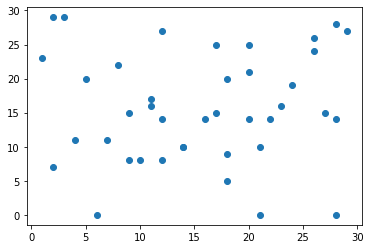

In [25]:
plt.plot(data[:,0], data[:,1], 'o')
plt.show()

## Implementation of KMeans clustering.

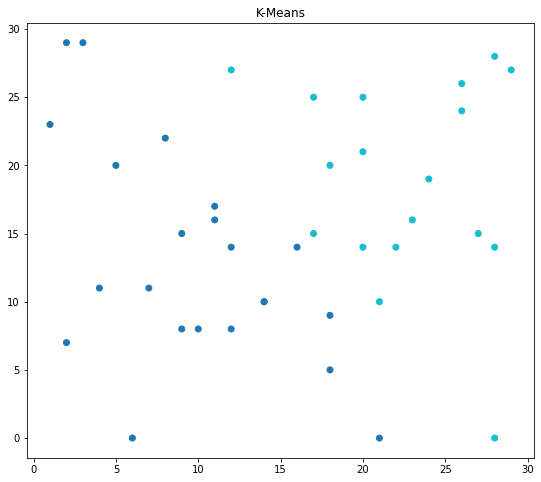

In [15]:
kmeans = KMeans(n_clusters=2, random_state=2).fit_predict(data)
plt.figure(figsize=(20,8))
plt.subplot(121, title='K-Means')
plt.scatter(data[:,0], data[:,1], c=kmeans, cmap='tab10')
plt.show()

## Implementation of Gaussian Mixture

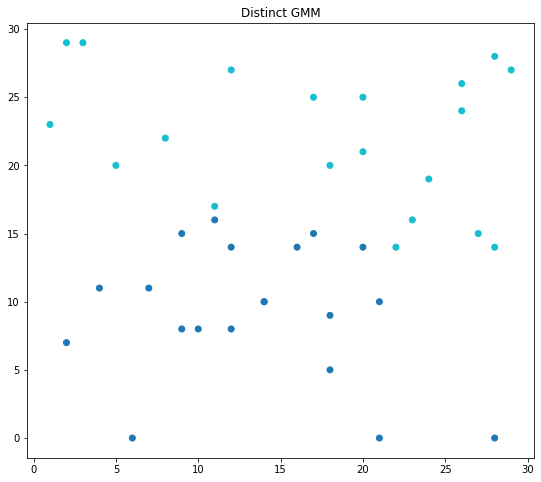

In [17]:
gmm_distinct = GaussianMixture(n_components=2).fit(data).predict(data)

plt.figure(figsize=(20,8))
plt.subplot(122, title='Distinct GMM')
plt.scatter(data[:,0], data[:,1], c=gmm_distinct, cmap='tab10')
plt.show()

## Finding optimal number of clusters

### GMM

There are two common statistical approaches to estimating how well a given probabilistic model fits a dataset and how complex the model is. And each can be shown to be equivalent or proportional to each other, although each was derived from a different framing or field of study.

They are:

Akaike Information Criterion (AIC). Derived from frequentist probability.

Bayesian Information Criterion (BIC). Derived from Bayesian probability.

In [19]:
# Set up a range of cluster numbers to try
n_range = range(2,11)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

In [21]:
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(data)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(data))
    aic_score.append(gm.aic(data))
    

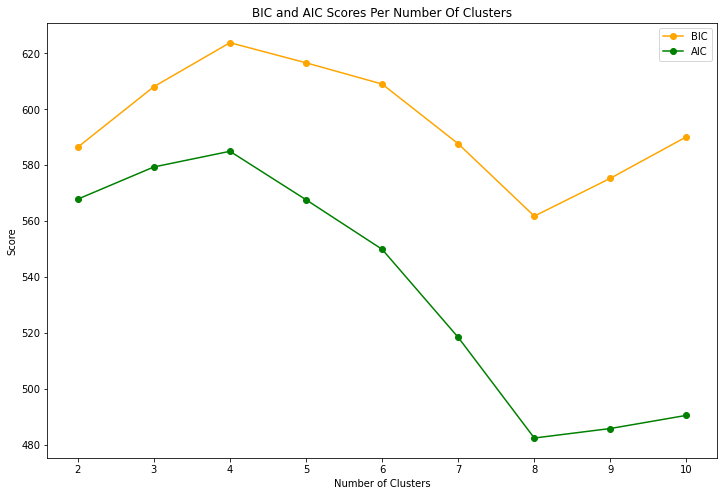

In [59]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange', label = 'BIC')
ax.plot(n_range, aic_score, '-o', color='green', label = 'AIC')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')
plt.legend()
plt.show()

8 Clusters seems to be efficient for the random data.

### KMeans

K-means clustering minimizes within-cluster variances (squared Euclidean distances).

In [43]:
Sum_of_squared_distances = []

In [44]:
for n in n_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

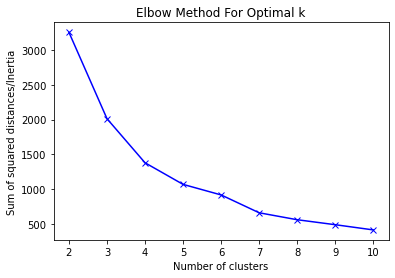

In [45]:
plt.plot(n_range, Sum_of_squared_distances,"bx-")
plt.xlabel("Number of clusters") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

Elbow method results are unclear. No clear evidence of a gradient shift indicative of optimal number of clusters. So, to accompany this, we will do a silhouette test. 

In [50]:
silhouette_avg = []

In [56]:
for n in n_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data, cluster_labels))

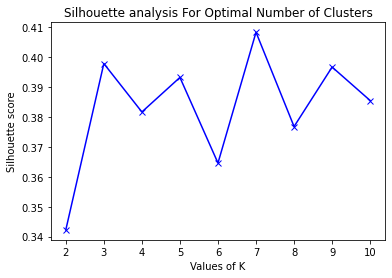

In [57]:
plt.plot(n_range, silhouette_avg, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal Number of Clusters")
plt.show()

Silhouette score indicates that 7 clusters will suffice for the data, differing with the 8 given by the gaussian mixture model.

The slow "standard algorithm" for k-means clustering, and its associated expectation-maximization algorithm, is a special case of a Gaussian mixture model, specifically, the limiting case when fixing all covariances to be diagonal, equal and have infinitesimal small variance. Instead of small variances, a hard cluster assignment can also be used to show another equivalence of k-means clustering to a special case of "hard" Gaussian mixture modelling. This does not mean that it is efficient to use Gaussian mixture modelling to compute k-means, but just that there is a theoretical relationship, and that Gaussian mixture modelling can be interpreted as a generalization of k-means. (Murphy, 2012)

## References

Kevin P. Murphy (2012). Machine learning : a probabilistic perspective. Cambridge, Mass.: MIT Press. ISBN 978-0-262-30524-2. OCLC 810414751.